In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from fastai.vision import *
from fastai.metrics import accuracy

In [4]:
def get_img(img_url): return open_image(img_url)
# Function that displays many transformations of an image
def plots_of_one_image(img_url, tfms, rows=1, cols=3, width=15, height=5, **kwargs):
    img = get_img(img_url)
    [img.apply_tfms(tfms, **kwargs).show(ax=ax)
         for i,ax in enumerate(plt.subplots(rows,cols,figsize=(width,height))[1].flatten())]

In [5]:
img_url='/content/drive/My Drive/IdentifyDance/dataset/train/190.jpg'

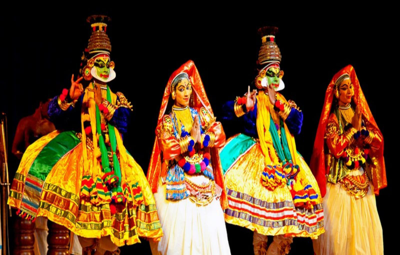

In [7]:
from PIL import Image 
im = Image.open(img_url)
im.resize((400,255))

This is the picture i am considering for showing the augmentations which are shown in default get_transform() of Fast-AI 


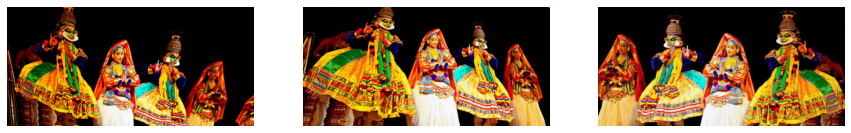

In [8]:
tfms = get_transforms()
plots_of_one_image(img_url,tfms[0])

random transformations with a probability of 75%: crop, horizontal flip, zoom up to 1.1, brightness and contrast, wrap 

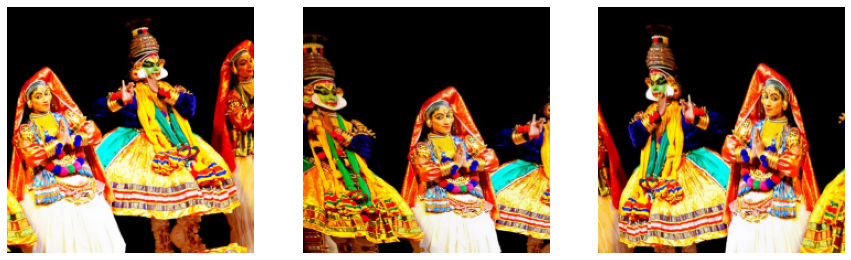

In [9]:
tfms = get_transforms()
plots_of_one_image(img_url,tfms[0],size=224)

To generate images of the same size, square or rectangle(size)

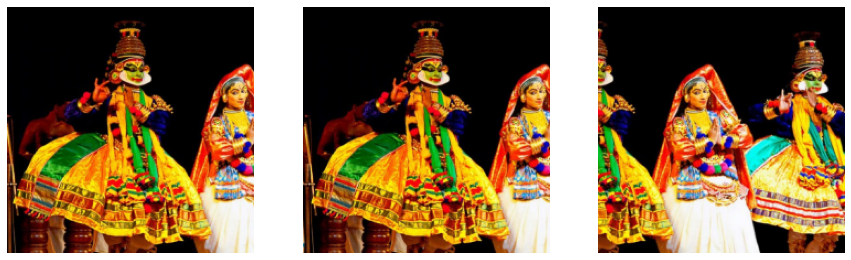

In [10]:
tfms = [rand_crop(p=2)]
plots_of_one_image(img_url,tfms,size=224)

rand_crop that randomly applies crops (with a probability of p) for a size defined by the argument size.

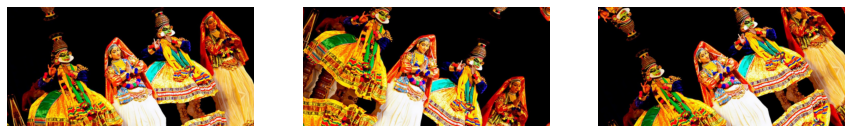

In [11]:
tfms = [rotate(degrees=(-35,35), p=1.0)]
plots_of_one_image(img_url,tfms)

rotate() that randomly rotates (with probability) an angle between min and max degree.

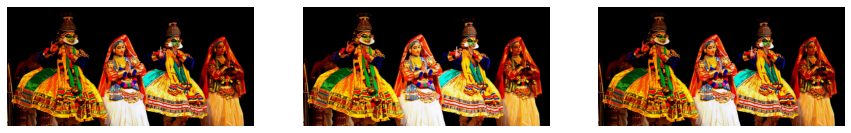

In [12]:
tfms = [brightness(change=(0.1, 0.9), p=1.0)]
plots_of_one_image(img_url,tfms)

 brightness() that randomly applies brightness changes (with a probability of p) between change_min and change_max

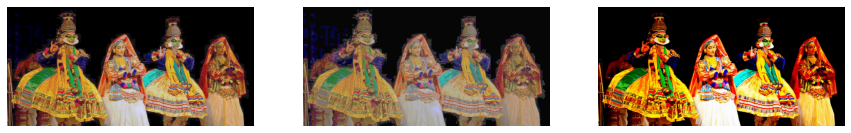

In [13]:
tfms = [contrast(scale=(0.2, 4.), p=1.5)]
plots_of_one_image(img_url,tfms)

contrast() that randomly applies contrast changes (with a probability ) between scale_min and scale_max (scale=0 transforms into gray, scale > 1 in very contrasted image and scale=1 does not apply transformation)

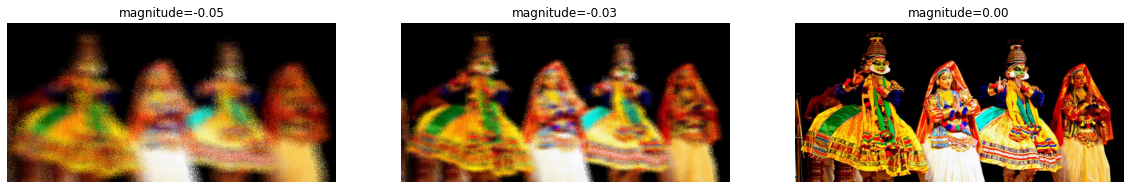

In [14]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfms = [jitter(magnitude=magnitude, p=1.)]
    get_img(img_url).apply_tfms(tfms).show(ax=ax,title=f'magnitude={magnitude:.2f}')

noise() that randomly introduces noise of a certain level of magnitude .



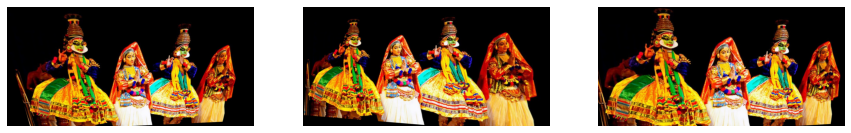

In [15]:
tfms = [symmetric_warp(magnitude=(-0.2,0.2), p=1.)]
plots_of_one_image(img_url,tfms,padding_mode='zeros')

symmetric_wrap() that randomly introduces perspective 

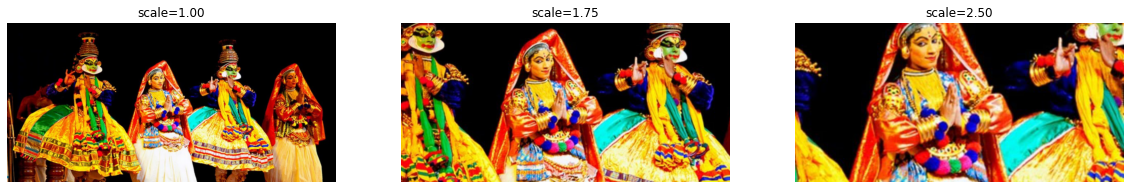

In [16]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
for scale, ax in zip(np.linspace(1.,2.5,3), axs):
    tfms = [zoom(scale=scale, p=1.)]
    get_img(img_url).apply_tfms(tfms).show(ax=ax,title=f'scale={scale:.2f}')

zoom() allows to randomly zoom

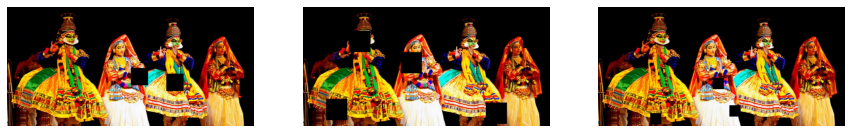

In [17]:
tfms = [cutout(n_holes=(4,6), length=(50, 160), p=1.)]
plots_of_one_image(img_url,tfms)

cutout() is used to randomly display  black squares in an image 

In [18]:
path = '/content/drive/My Drive/IdentifyDance/dataset/Data'
size = 255
bs = 16

data = ImageDataBunch.from_folder(path,  test='/content/drive/My Drive/IdentifyDance/dataset/test',
                                  ds_tfms=get_transforms(),
                                  valid_pct=0.2, 
                                  size=size, 
                                  bs=bs)

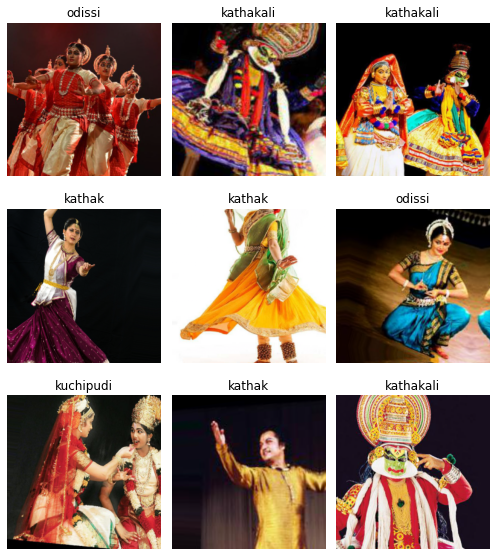

In [36]:
data.show_batch(rows=3, figsize=(7, 8))

Images generated by the ImageDataBunch after applying the transformations defined in get_transforms ()

In [20]:
data.classes

['bharatanatyam',
 'kathak',
 'kathakali',
 'kuchipudi',
 'manipuri',
 'mohiniyattam',
 'odissi',
 'sattriya']

This shows all the classes present in the data.

In [21]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2148 items)
x: ImageList
Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255)
y: CategoryList
sattriya,sattriya,sattriya,sattriya,sattriya
Path: /content/drive/My Drive/IdentifyDance/dataset/Data;

Valid: LabelList (537 items)
x: ImageList
Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255)
y: CategoryList
kuchipudi,kuchipudi,manipuri,mohiniyattam,kuchipudi
Path: /content/drive/My Drive/IdentifyDance/dataset/Data;

Test: LabelList (156 items)
x: ImageList
Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255),Image (3, 255, 255)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/IdentifyDance/dataset/Data

Above text is the output summary

In [22]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy], callback_fns=ShowGraph)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


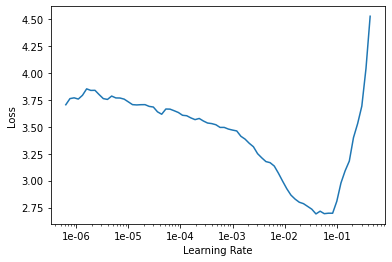

In [23]:
learner.lr_find()
learner.recorder.plot()

The learner object has a built in function to find a optimal learining rate  for training

And in this cas we can see that this is the case for learning rates between 0.001 and 0.01.

epoch,train_loss,valid_loss,accuracy,time
0,1.034618,0.289697,0.895717,03:31
1,0.734888,0.268359,0.925512,01:12
2,0.779139,0.134096,0.962756,01:13
3,0.574636,0.076404,0.973929,01:12
4,0.312948,0.026273,0.992551,01:13
5,0.221777,0.009945,0.996276,01:13
6,0.167816,0.001913,1.000000,01:13
7,0.125625,0.001663,1.000000,01:13


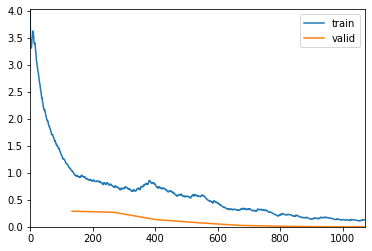

In [24]:
learner.fit_one_cycle(8, max_lr=slice(1e-3, 1e-2))

Lets our model for 8 epochs, with a learning rate between 0.001 and 0.01

Before we unfreeze the layers and learn again, we save the weights so that we can go back in case we mess up

epoch,train_loss,valid_loss,accuracy,time
0,0.101087,0.000866,1.000000,01:16
1,0.098507,0.001530,1.000000,01:14
2,0.120964,0.001405,1.000000,01:14
3,0.093827,0.005044,0.998138,01:14
4,0.103424,0.000924,1.000000,01:15
5,0.084979,0.000767,1.000000,01:15
6,0.054526,0.000297,1.000000,01:14
7,0.046610,0.000305,1.000000,01:15
8,0.029458,0.000314,1.000000,01:14
9,0.031329,0.000528,1.000000,01:15


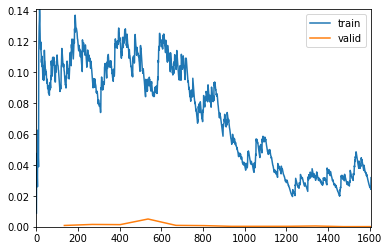

In [31]:
learner.save('stage-1')

learner.unfreeze()
learner.fit_one_cycle(12, max_lr=slice(1e-5, 1e-4))

If we try fitiing after this that will lead to over fitting

In [32]:
preds,y=learner.get_preds(ds_type=DatasetType.Test)
preds = np.argmax(preds, axis = 1)
preds_classes = [data.classes[i] for i in preds]

In [33]:
submission = pd.DataFrame({ 'Image': os.listdir('/content/drive/My Drive/IdentifyDance/dataset/test'), 'target': preds_classes })
submission.to_csv('test_classification_results.csv', index=False)

In [34]:
submission

,Image,target
0,465.jpg,kuchipudi
1,429.jpg,kuchipudi
2,386.jpg,kuchipudi
3,238.jpg,kathakali
4,401.jpg,odissi
...,...,...
151,380.jpg,kuchipudi
152,479.jpg,odissi
153,374.jpg,kuchipudi
154,438.jpg,kuchipudi


This is the result of classifying the test data.

After changing different parameters and optimizinf the model I was able to predict with an accuracy of 89.9% on the leadership board. 